In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats

## Data description

Data taken from:

https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

Contains detailed reviews with some additional informations on products (clothes), customers.
The data consists 23486 rows for each 10 columns: 
- Clothing ID - unique ID of the product	
- Age - customer age	
- Title - review title	
- Review Text - review content 	
- Rating - review rating	
- Recommended IND - if the product is recommended by reviewer	
- Positive Feedback Count - number of positive feedback (likes) of the review	
- Division Name - name of the division product is in	
- Department Name - name of the department product is in	 	
- Class Name - type of the clothing

### Load data

In [2]:
df=pd.read_csv('data/Womens Clothing E-Commerce Reviews.csv') 
df.drop(columns=['Unnamed: 0'],inplace=True) # drop column with indices

### Data sample

In [3]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Data Analysis

We can see 23486 entries with int64 and object columns. Memory taken is ~1.8 MB.For some colums there are missting values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


From dataframe description we can see that the average age is 43, the customers mostly recommended clothes they bought. Average rating is  ~4.2 so we can also see that the ratings are mostly positives. Average positive feedback count of the reviews is ~2.5 so we can see that customers are active and they leave feedback under other customers reviews.

In [5]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


On this chart below we can see that the average age is ~ 43 and there is much less people older then 80 years. 

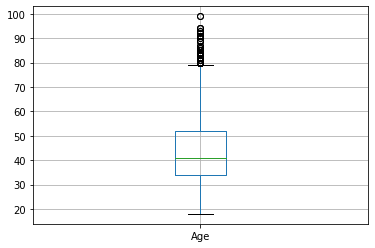

In [6]:
boxplot = df.boxplot(column=['Age'])



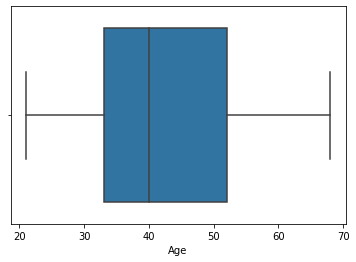

In [7]:
sns.boxplot( x=df['Age'],data=df['Age'])

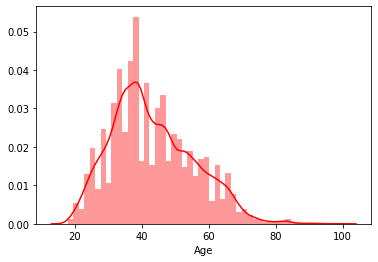

In [8]:
sns.distplot( df["Age"] , color="red", label="Age")

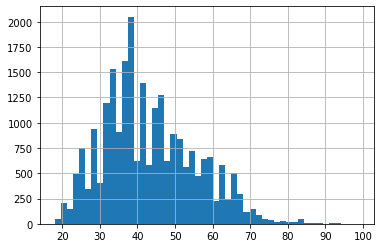

In [9]:
age_histogram= df['Age'].hist(bins=50)

Rating is mostly positive. Mostly common values are: 4, 5. We have also 3,2,1 but it's a smaller group. 

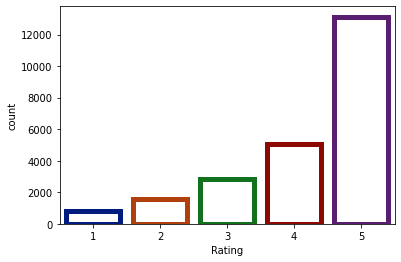

In [10]:
 sns.countplot(x="Rating", data=df,

                   facecolor=(0, 0, 0, 0),

                   linewidth=5,

                   edgecolor=sns.color_palette("dark", 5))

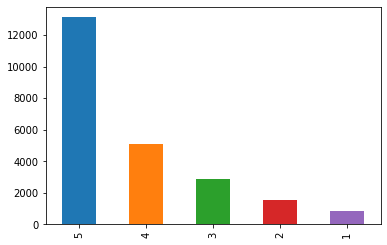

In [11]:
df['Rating'].value_counts().plot(kind='bar')

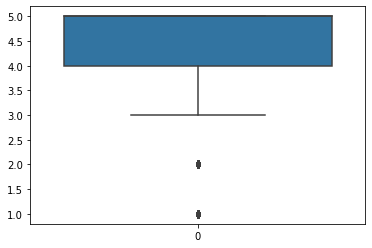

In [12]:
sns.boxplot(data=df['Rating'])

We check how much rows have the same clothing ID.We can see that there is a lot of reviews of the same clothing as ID represents certain cloth.  

In [13]:
cloths_counts= df['Clothing ID'].value_counts()
cloths_counts

1078    1024
862      806
1094     756
1081     582
872      545
829      527
1110     480
868      430
895      404
936      358
867      351
850      338
1095     327
863      306
1077     297
1059     294
1086     291
1080     289
860      288
1083     249
861      244
873      238
828      225
1092     220
1033     220
927      214
1056     213
820      211
836      205
1022     205
        ... 
88         1
72         1
56         1
1191       1
1175       1
1183       1
1127       1
887        1
600        1
648        1
680        1
712        1
137        1
105        1
89         1
73         1
57         1
41         1
25         1
9          1
1176       1
1160       1
1032       1
856        1
808        1
792        1
776        1
744        1
728        1
0          1
Name: Clothing ID, Length: 1206, dtype: int64

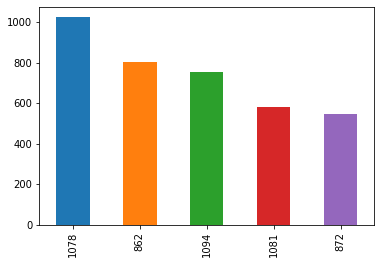

In [14]:
cloths_counts.head().plot(kind='bar')

As seen before there is a lot more recommended clothes then not recommended.

In [15]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

The rating is correlated with the cloth recommendation and the average rating for recommended clothes is 2.3 higher then the clothes witch where not recommended.

In [16]:
df.groupby('Recommended IND')['Rating'].agg('mean')

Recommended IND
0    2.303691
1    4.604794
Name: Rating, dtype: float64

Division name isn't so correlated with rating. We can see that the average rating for each division is almost equal.

In [17]:
df.groupby('Division Name')['Rating'].agg('mean')

Division Name
General           4.176606
General Petite    4.211084
Initmates         4.286285
Name: Rating, dtype: float64

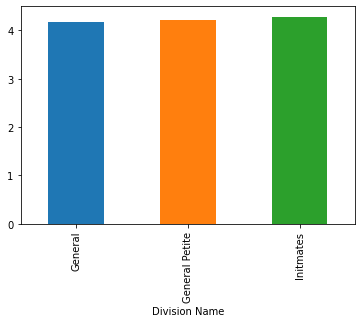

In [18]:
df.groupby('Division Name')['Rating'].agg('mean').plot(kind='bar')

In [19]:
df['Division Name'].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: Division Name, dtype: int64

Department Name is simillar. The ratings are almost equal.

In [20]:
df.groupby('Department Name')['Rating'].agg('mean')

Department Name
Bottoms     4.288760
Dresses     4.150815
Intimate    4.280115
Jackets     4.264535
Tops        4.172239
Trend       3.815126
Name: Rating, dtype: float64

In [21]:
df['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

The first ten agregated counts of positive feedback counts shows that we have mostly 0. Then the number of feedback counts for each count decreases when the count rises.   

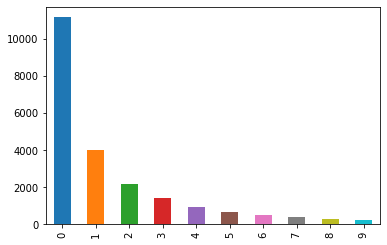

In [22]:
df['Positive Feedback Count'].value_counts().head(10).plot(kind='bar')

Class name also apperace as uncorrelated with the rating as for each class the ratings are simillar.

In [23]:
df.groupby('Class Name')['Rating'].agg('mean')

Class Name
Blouses           4.154020
Casual bottoms    4.500000
Chemises          4.000000
Dresses           4.150815
Fine gauge        4.260909
Intimates         4.279221
Jackets           4.295455
Jeans             4.360942
Knits             4.161677
Layering          4.376712
Legwear           4.278788
Lounge            4.301013
Outerwear         4.198171
Pants             4.265850
Shorts            4.255521
Skirts            4.245503
Sleep             4.285088
Sweaters          4.179272
Swim              4.197143
Trend             3.815126
Name: Rating, dtype: float64

In [24]:
df['Class Name'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

On the chart below we can see a heatmap with feature correlation. The correlations are small for each feature except rating and recommendation. This fits to the previous observations.

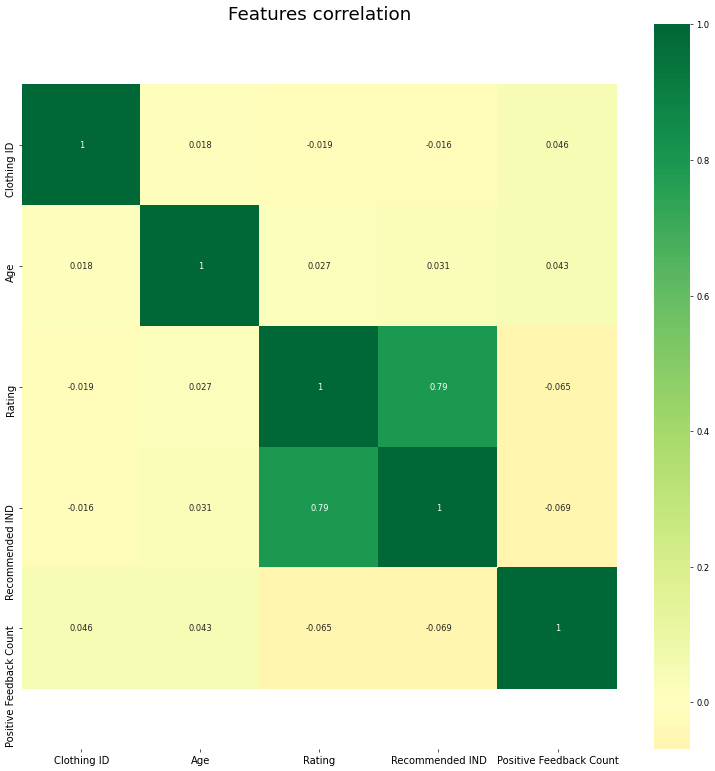

In [25]:
# Plot
plt.figure(figsize=(16, 16), dpi= 60)
ax = sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Features correlation', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The graph below shows the amount of rates (rating) for each department name. Tops got the highest amount of the best rates. This tendency is maintained in each type of department name. It might be noticed that, in general, the highest amount of rates is given in tops - department name.

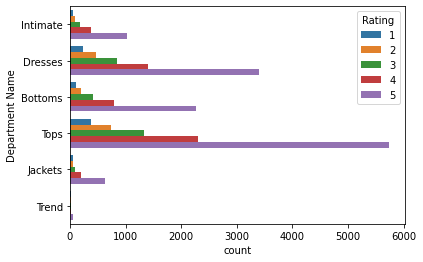

In [26]:
ax = sns.countplot(y="Department Name", hue="Rating", data=df)

Similar situation is presented on the chart below. It might be noticed that clients gave 5 to division name the most often. The best rates got General - division name. Initmates were gotten rates the least often.


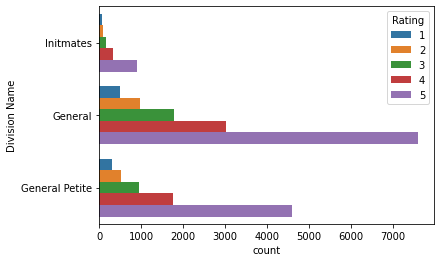

In [27]:
ax = sns.countplot(y="Division Name", hue="Rating", data=df)

## Sentiment Analysis

In this part of the project, reviews context analysis which is sentiment analysis was done. We are able to evaluate whether a given review is positive or negative thanks to sentiment analysis. We are also analysing the most importand words from all reviews.

In [28]:
# NA values were deleted below
df.dropna(inplace=True)
# create the label, for reviews with rating >= 4 we assign 0 and for reviews with rating <=3 we assign 1
df["is_bad_review"] = df["Rating"].apply(lambda x: 1 if x < 4 else 0)
# select only relevant columns, create new dataframe for thi analysis
reviews_df = df[["Review Text", "is_bad_review"]]
reviews_df.columns=['review','is_bad_review']
reviews_df.head()

,review,is_bad_review
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0
5,"I love tracy reese dresses, but this one is no...",1
6,I aded this in my basket at hte last mintue to...,0


In [29]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
   
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return text

# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

/home/kodolamacz/Pulpit/e-commerce_analyse/venv/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Below we can see that the reviews are properly cleaned

In [30]:
reviews_df.head()

,review,is_bad_review,review_clean
2,I had such high hopes for this dress and reall...,1,high hope dress really wanted work initially o...
3,"I love, love, love this jumpsuit. it's fun, fl...",0,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,0,shirt flatter due adjustable front tie perfect...
5,"I love tracy reese dresses, but this one is no...",1,love tracy reese dress one petite foot tall us...
6,I aded this in my basket at hte last mintue to...,0,aded basket hte last mintue see would look lik...


In [31]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review_clean"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kodolamacz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/home/kodolamacz/Pulpit/e-commerce_analyse/venv/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/home/kodolamacz/Pulpit/e-commerce_analyse/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound
2,I had such high hopes for this dress and reall...,1,high hope dress really wanted work initially o...,0.038,0.692,0.270,0.9081
3,"I love, love, love this jumpsuit. it's fun, fl...",0,love love love jumpsuit fun flirty fabulous ev...,0.179,0.183,0.638,0.9437
4,This shirt is very flattering to all due to th...,0,shirt flatter due adjustable front tie perfect...,0.000,0.513,0.487,0.8860
5,"I love tracy reese dresses, but this one is no...",1,love tracy reese dress one petite foot tall us...,0.035,0.725,0.240,0.8979
6,I aded this in my basket at hte last mintue to...,0,aded basket hte last mintue see would look lik...,0.049,0.824,0.127,0.6361


In [33]:
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

We can see negative, neutral, positive and compound scores for each review. Additionally we added chars and words quantity.

In [34]:
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words
2,I had such high hopes for this dress and reall...,1,high hope dress really wanted work initially o...,0.038,0.692,0.270,0.9081,500,98
3,"I love, love, love this jumpsuit. it's fun, fl...",0,love love love jumpsuit fun flirty fabulous ev...,0.179,0.183,0.638,0.9437,124,22
4,This shirt is very flattering to all due to th...,0,shirt flatter due adjustable front tie perfect...,0.000,0.513,0.487,0.8860,192,36
5,"I love tracy reese dresses, but this one is no...",1,love tracy reese dress one petite foot tall us...,0.035,0.725,0.240,0.8979,488,98
6,I aded this in my basket at hte last mintue to...,0,aded basket hte last mintue see would look lik...,0.049,0.824,0.127,0.6361,496,101


We can see that in our data there is much less bad reviews.

In [35]:
reviews_df["is_bad_review"].value_counts(normalize = True) 

0    0.770369
1    0.229631
Name: is_bad_review, dtype: float64

Below we can see the most positiv, negativ, neutral and compound reviews examples.As we read them we can see that there are properly matched with the coreesponding scores. 

In [36]:
reviews_df.sort_values('pos',ascending=False)[['review','pos']].head(10)

,review,pos
13399,Fits perfect!,1.00
18437,Fits great and super flattering,1.00
11249,So pretty & comfortable! love it!,1.00
15653,Fits perfect.,1.00
23081,Love this top!! fits perfectly & it's lovely,1.00
15265,"Fits great, comfortable!",1.00
1990,I loved this top . it is beautiful.,1.00
6588,Love this top!!!! it is just gorgeous and fits...,1.00
7785,Great fit,1.00
5201,This swimsuit is so beautiful and fits wonderf...,0.96


In [37]:
reviews_df.sort_values('neg',ascending=False)[['review','neg']].head(10)

,review,neg
5114,"What a disappointment and for the price, it's ...",0.863
6296,"Awful color, horribly wrinkled and just a mess...",0.752
14754,"Cut out design, no seems or hems.\r\n very dis...",0.565
5589,I'm dying for this skirt in the picture. where...,0.565
588,Fits very strange. odd cut. does not look well...,0.525
16346,Only negative thing is that it sheds. and even...,0.514
3777,Material is too thin and quality is poor,0.508
22822,"It's the perfect long, loose t-shirt. flatteri...",0.464
18973,The details and colors are exquisite. stop hes...,0.462
751,"Can be a bit itchy sometimes, i guess dependin...",0.444


In [38]:
reviews_df.sort_values('neu',ascending=False)[['review','neu']].head(10)

,review,neu
14852,"I am 5' 7"" with an athletic build (small chest...",1.0
8247,"Very cozy lounge tee, but runs large. i ordere...",1.0
11643,The print doesn't necessarily works for everyb...,1.0
20901,This didn't work for me. the piece looked che...,1.0
4521,I bought this shirt along with a matching vest...,1.0
7746,I tried the yellow striped dress on in the sto...,1.0
14911,"When i read car coat, i expect a little more w...",1.0
19914,This dress is shorter than it looks on the mod...,1.0
16683,These have become my go-to shorts as i can dre...,1.0
16703,I bought a size 8 a few years back not my regu...,1.0


In [39]:
reviews_df.sort_values('compound',ascending=False)[['review','compound']].head(10)

,review,compound
20824,"This dress is so gorgeous! it fits perfectly, ...",0.9947
20043,I saw this top online and fell in love with th...,0.9941
18256,I ordered this dress with the 25% off everythi...,0.9936
20890,"Wow, wow, wow! this is so retailer! the dress ...",0.9931
15514,I highly recommend this dress! it is super fla...,0.9928
18836,This dress is much cuter in person than it loo...,0.9927
7551,Love love love this tunic. it has panels that ...,0.9925
16238,This skirt is gorgeous. i'm glad i saw it in-s...,0.9924
5686,If you love denim skirts as much or more than ...,0.9924
5977,This is a great top! i love the color of the p...,0.9922


## Words importance

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
tv = TfidfVectorizer(min_df=3, max_df=0.5)

In [42]:
tfidf_matrix = tv.fit(reviews_df['review_clean'])
arts_encoded = tfidf_matrix.transform(reviews_df['review_clean'])

In [43]:
k = 5
most_important_words=[]
feature_names = np.array(tv.get_feature_names())
for i in range(len(reviews_df)):
    sorted_idxs = arts_encoded.getrow(i).todense().A.argsort().ravel()
    best_idxs = sorted_idxs[-k:][::-1] 
    most_important_words.append(feature_names[best_idxs])

reviews_df['most_important_words']=most_important_words

In [44]:
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,most_important_words
2,I had such high hopes for this dress and reall...,1,high hope dress really wanted work initially o...,0.038,0.692,0.270,0.9081,500,98,"[net, layer, half, directly, small]"
3,"I love, love, love this jumpsuit. it's fun, fl...",0,love love love jumpsuit fun flirty fabulous ev...,0.179,0.183,0.638,0.9437,124,22,"[flirty, love, fabulous, jumpsuit, nothing]"
4,This shirt is very flattering to all due to th...,0,shirt flatter due adjustable front tie perfect...,0.000,0.513,0.487,0.8860,192,36,"[pairs, shirt, adjustable, sleeveless, due]"
5,"I love tracy reese dresses, but this one is no...",1,love tracy reese dress one petite foot tall us...,0.035,0.725,0.240,0.8979,488,98,"[dress, embellishment, stranger, reese, tracy]"
6,I aded this in my basket at hte last mintue to...,0,aded basket hte last mintue see would look lik...,0.049,0.824,0.127,0.6361,496,101,"[hte, oops, basket, teh, kept]"


In [45]:
from collections import Counter

From the most important words select the most common ones.

In [46]:
important_words = []
for words in reviews_df['most_important_words']:
    important_words.extend(words)
counter=Counter(important_words)
counter.most_common() 

[('dress', 965),
 ('top', 541),
 ('shirt', 505),
 ('sweater', 431),
 ('skirt', 391),
 ('size', 331),
 ('pant', 325),
 ('great', 300),
 ('jean', 283),
 ('small', 281),
 ('jacket', 271),
 ('petite', 270),
 ('love', 247),
 ('medium', 240),
 ('short', 234),
 ('blouse', 231),
 ('large', 201),
 ('tee', 192),
 ('waist', 181),
 ('buy', 178),
 ('nice', 175),
 ('black', 173),
 ('cute', 172),
 ('perfect', 171),
 ('button', 170),
 ('wash', 167),
 ('shoulder', 167),
 ('arm', 165),
 ('order', 163),
 ('get', 162),
 ('really', 161),
 ('like', 161),
 ('look', 158),
 ('white', 158),
 ('comfortable', 157),
 ('sleeve', 156),
 ('super', 156),
 ('blue', 153),
 ('print', 153),
 ('color', 146),
 ('work', 146),
 ('well', 143),
 ('purchase', 142),
 ('beautiful', 142),
 ('big', 142),
 ('coat', 141),
 ('tank', 140),
 ('pair', 139),
 ('comfy', 138),
 ('little', 137),
 ('feel', 134),
 ('pretty', 133),
 ('style', 132),
 ('wear', 131),
 ('green', 131),
 ('legging', 130),
 ('material', 129),
 ('good', 129),
 ('one', 1

Display the most common words on a chart using WordCloud

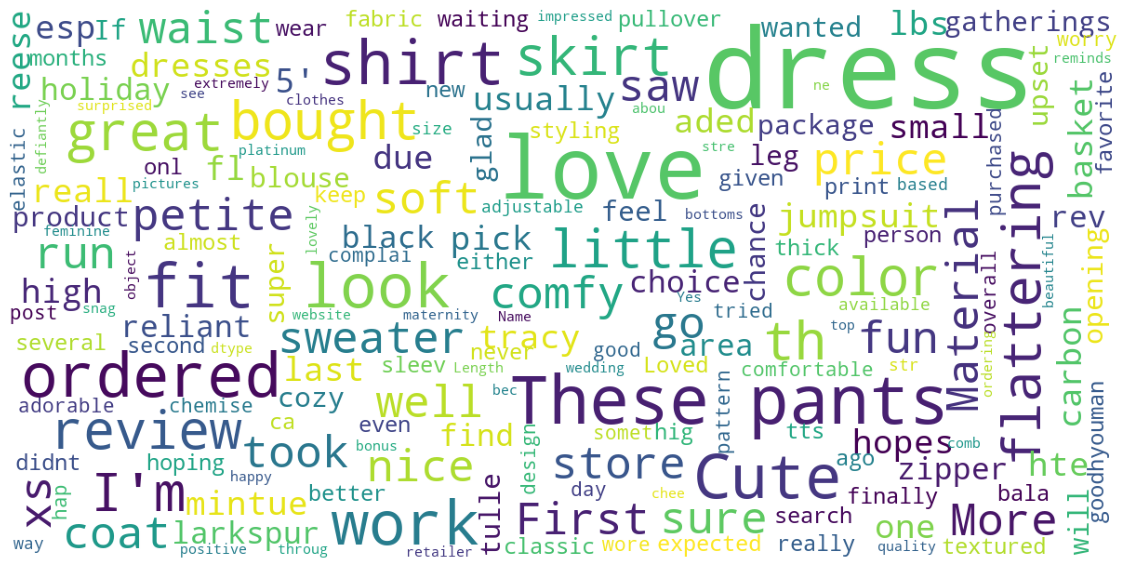

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    
show_wordcloud(reviews_df["review"])

## Classification

In [48]:
df['is_bad_review']=reviews_df['is_bad_review']

In [49]:
df[['Age','Rating','Recommended IND','is_bad_review']].groupby('is_bad_review').mean()

,Age,Rating,Recommended IND
is_bad_review,,,
0,43.497722,4.716842,0.988975
1,42.466002,2.392691,0.245183


Firstly we tryied to predict rating, but this appeared to be to hard with our data. We can see the results clearly on the confusion matrix at the last step of validating the model. The model is mostly guessing 5 rating, but it is rarely choosing other ratings. The clasification report confirms this.

In [50]:
labels= df['Rating']
data = df[['Age','Recommended IND']]
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data, labels)
                                                     
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.score(X_test, y_test)


0.6375101708706266

In [51]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_test, y_test, cv=10).mean()
predictions=clf.predict(X_test)

In [52]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.59      0.42      0.49       833
           4       0.00      0.00      0.00         0
           5       1.00      0.68      0.81      4083

    accuracy                           0.64      4916
   macro avg       0.32      0.22      0.26      4916
weighted avg       0.93      0.64      0.76      4916



/home/kodolamacz/Pulpit/e-commerce_analyse/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


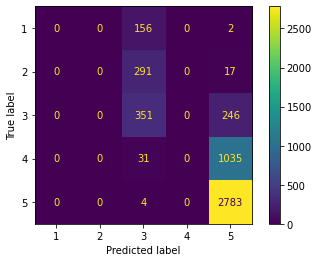

In [53]:
# confusion matrix
plot_confusion_matrix(clf, X_test, y_test)

We are choosing a simpler problem - we will be classifying if the review is bad or not. As we can see on the results below this is much simpler task and the first model choosen by as - neural network worked pretty well and scored 93% accuracy.

In [54]:

labels= df['is_bad_review']
data = df[['Age','Recommended IND','Positive Feedback Count']]
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels)
                                                     
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9336859235150529

In [55]:
cross_val_score(clf, X_test, y_test, cv=10).mean()

0.9347006275561738

In [56]:
predictions=clf.predict(X_test)


In [57]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4023
           1       0.75      0.95      0.84       893

    accuracy                           0.93      4916
   macro avg       0.87      0.94      0.90      4916
weighted avg       0.95      0.93      0.94      4916



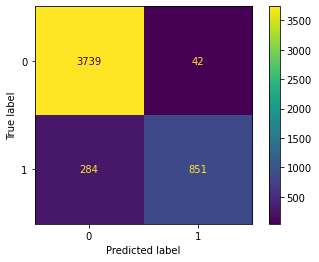

In [58]:
plot_confusion_matrix(clf, X_test, y_test)

We will use the same model - mlp classifier. However, classification is made based on the following variables: recommended IND and Positive Feedback Count. This model worked very well - its accuracy equals ~94%.

In [59]:
data = df[['Recommended IND','Positive Feedback Count']]
X_train, X_test, y_train, y_test = train_test_split(data, labels)
                                                     
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9332790886899919

In [60]:
cross_val_score(clf, X_test, y_test, cv=10).mean()

0.9332757935522329

In [61]:
predictions=clf.predict(X_test)

In [62]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4014
           1       0.76      0.94      0.84       902

    accuracy                           0.93      4916
   macro avg       0.87      0.94      0.90      4916
weighted avg       0.94      0.93      0.94      4916



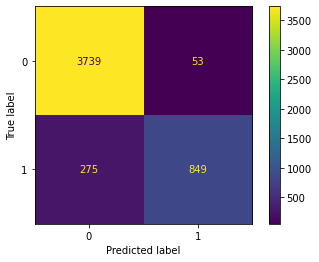

In [63]:
plot_confusion_matrix(clf, X_test, y_test) 

SVM, NB and K-NN models were used to solve the problem in next part. We are validating diffrent models to see which gives the best score.

We can notice that GaussianNB model's performance is similar to the MLP neural networks. Accuracy in this model equals ~93%, It's a little worse then MLP.

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
predictions = gnb.fit(X_train, y_train).predict(X_test)
gnb.score(X_test, y_test)



0.9296175752644427

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score(gnb, X_test, y_test, cv=10).mean()

0.9300196214793104

In [66]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      3990
           1       0.76      0.92      0.83       926

    accuracy                           0.93      4916
   macro avg       0.87      0.93      0.89      4916
weighted avg       0.94      0.93      0.93      4916



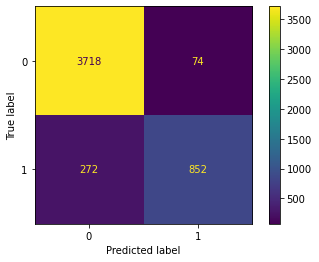

In [67]:
plot_confusion_matrix(gnb, X_test, y_test)

SVM model classifies all "is_bad_reviews" variable well - accuracy equals to ~ 94%.

In [68]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


svc_model = LinearSVC(random_state=0)
predictions = svc_model.fit(X_train, y_train).predict(X_test)
svc_model.score(X_test, y_test)

/home/kodolamacz/Pulpit/e-commerce_analyse/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9332790886899919

In [69]:
cross_val_score(svc_model, X_test, y_test, cv=10).mean()

/home/kodolamacz/Pulpit/e-commerce_analyse/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kodolamacz/Pulpit/e-commerce_analyse/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kodolamacz/Pulpit/e-commerce_analyse/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kodolamacz/Pulpit/e-commerce_analyse/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kodolamacz/Pulpit/e-commerce_analyse/venv/

0.9332757935522329

In [70]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4014
           1       0.76      0.94      0.84       902

    accuracy                           0.93      4916
   macro avg       0.87      0.94      0.90      4916
weighted avg       0.94      0.93      0.94      4916



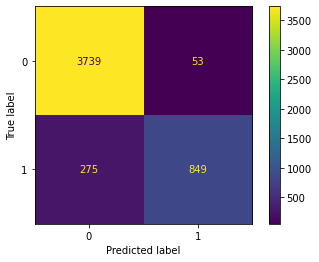

In [71]:
plot_confusion_matrix(svc_model, X_test, y_test)

K-NN model's performance is similar to the others ones used before. It's accuracy is ~93%.

In [72]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(X_train, y_train)
predictions = neigh.predict(X_test)
neigh.score(X_test, y_test)

0.9300244100895037

In [73]:
cross_val_score(neigh, X_test, y_test, cv=10).mean()

0.9237163247396222

In [74]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      3998
           1       0.76      0.92      0.83       918

    accuracy                           0.93      4916
   macro avg       0.87      0.93      0.89      4916
weighted avg       0.94      0.93      0.93      4916



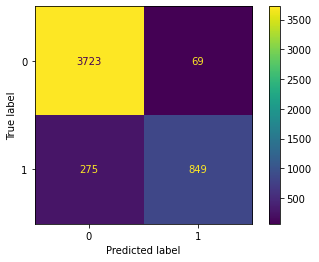

In [75]:
plot_confusion_matrix(neigh, X_test, y_test)

In [76]:

df['Division Name'].value_counts()

General           11664
General Petite     6778
Initmates          1220
Name: Division Name, dtype: int64

Variable - division name which type is object can be categorised. Variable has 3 categories.

In [77]:


df['Division Name'].value_counts()
division_map = {
    'General': 0,
    'General Petite': 1,
    'Initmates': 2
}

df['Division Name category'] =df['Division Name'].apply(lambda x: division_map.get(x))

Division name variable was put into the model. It was not correlated so we are not expecting major improvment. As we see below this didn't help. 

In [78]:
labels= df['is_bad_review']
data = df[['Age','Recommended IND','Positive Feedback Count','Division Name category']]

X_train, X_test, y_train, y_test = train_test_split(data, labels)
                                                     
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9367371847030106

Department name variable was categorized as well and checked whether model  improved.

In [79]:
df['Department Name'].value_counts()

Tops        8713
Dresses     5371
Bottoms     3184
Intimate    1408
Jackets      879
Trend        107
Name: Department Name, dtype: int64

In [80]:
df['Department Name'].value_counts()
division_map = {
    'Tops': 0,
    'Dresses': 1,
    'Bottoms': 2,
    'Intimate': 3,
    'Jackets': 4,
    'Trend': 5
}

df['Department Name category'] =df['Department Name'].apply(lambda x: division_map.get(x))

In [81]:

data = df[['Age','Recommended IND','Positive Feedback Count','Division Name category','Department Name category']]

X_train, X_test, y_train, y_test = train_test_split(data, labels)
                                                     
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9371440195280716

In [82]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      3998
           1       0.18      0.22      0.20       918

    accuracy                           0.67      4916
   macro avg       0.50      0.50      0.50      4916
weighted avg       0.69      0.67      0.68      4916



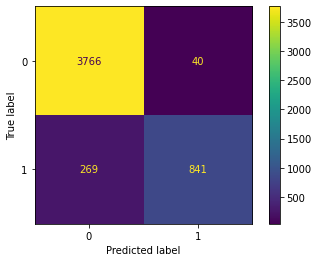

In [83]:
plot_confusion_matrix(clf, X_test, y_test)